
# OkCupid Data Analysis - Predicting Compatibility and Interaction

## Introduction
The rise of dating apps has brought a new dimension to the study of human behavior and romantic compatibility. OkCupid, one of the leading platforms in this space, uses user responses to questions to suggest potential matches.

In this project, we will explore OkCupid data to answer the following questions:

1. **Can we predict compatibility between two users based on their responses?**
2. **How does user behavior affect their chances of receiving a response?**

To address these questions, we will apply **data analysis** and **machine learning** techniques to uncover patterns and insights that can help us better understand the factors influencing success in online dating.


## Scoping

### Project Goals
The objective of this project is to apply the machine learning techniques learned through Codecademy to analyze a dataset. The main research question explored is whether it is possible to predict an OkCupid user's astrological sign based on other profile attributes.

## Exploratory Data Analysis

In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('profiles.csv') #initiating the dataset in a dataframe
df.head(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

In [89]:
print(df.columns) #as we are intending to predict the sign, let's see which features will help us make our prediction.

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [91]:
print(df.isnull().sum()) #check for NaN values

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


In [92]:
#Understanding the features that had 0 NaN values

for column in df.columns:
    if df[column].isnull().sum() == 0:
        print(f"Unique values of the {column}'s column")
        print(df[column].value_counts())
        print()

Unique values of the age's column
age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64

Unique values of the income's column
income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: cou

So, it seems that the income column has a -1 in the place of the Nan and the rest of them actually seem like do not have null values. Now, let´s dive into the Signs prediction.

In [93]:
#Let´s understand the signs distribution
print(df.sign.value_counts())
print(df.sign.dtype)

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;

It seems that there some words making our distribution bigger, let´s transform this column to only have the signs.

In [94]:
# Create cleaned sign DataFrame
sign_df = (
    df.dropna(subset=['sign'])  # Drop true NaN values
    .loc[~df['sign'].str.lower().eq('nan')]  # Drop string 'nan' entries
    .copy()
)

sign_df['sign'] = sign_df['sign'].str.split().str[0]
print(sign_df['sign'].value_counts())

sign
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

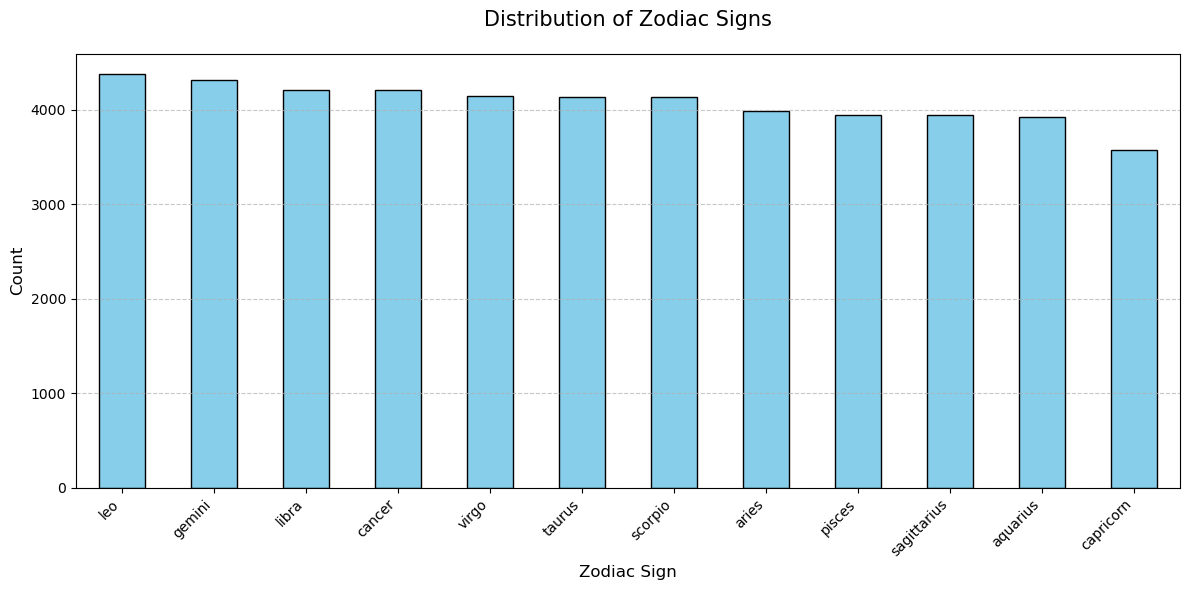

In [96]:
sign_count = sign_df.sign.value_counts()

plt.figure(figsize= (12,6))
sign_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Zodiac Signs', fontsize=15, pad=20)
plt.xlabel('Zodiac Sign', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Let´s check now how are the other features from our sign dataset

In [97]:
print(sign_df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


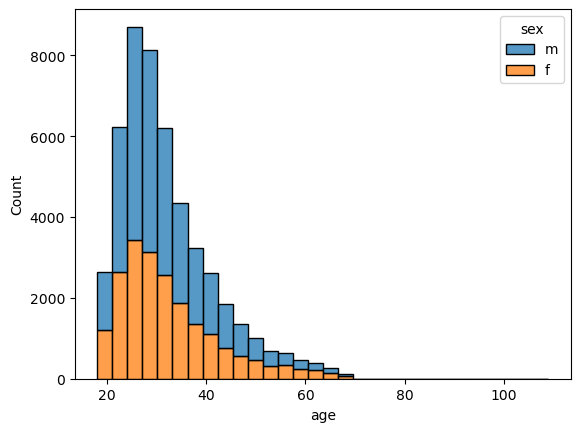

In [98]:
sns.histplot(data=sign_df, x='age', bins=30, hue='sex', multiple='stack')
plt.show()

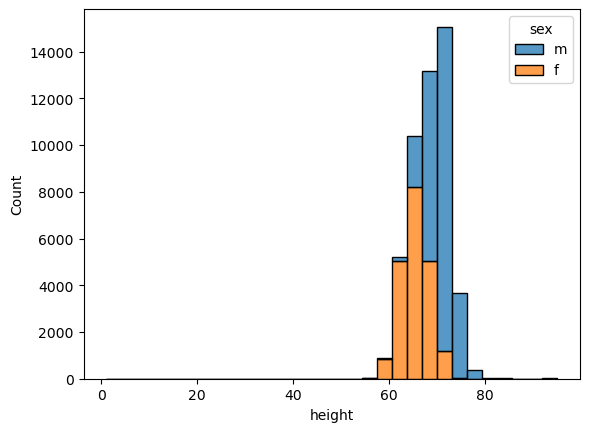

In [99]:
sns.histplot(data=sign_df, x='height', bins=30, hue='sex', multiple='stack')
plt.show()

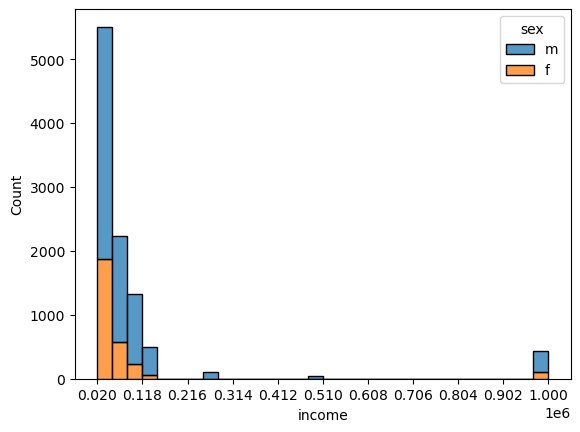

In [100]:
income_sign_df = sign_df[sign_df.income != -1]
ax = sns.histplot(data=income_sign_df, x="income", bins=30, hue='sex', multiple='stack')
min_income = int(income_sign_df['income'].min())
max_income = int(income_sign_df['income'].max())
step = (max_income - min_income) // 10  # 10 ticks total
ax.set_xticks(np.arange(min_income, max_income + step, step))
plt.show()

In [101]:
def plot_categorical_distribution(feature, df, palette="coolwarm"):
    """
    Creates a horizontal bar plot for a categorical feature.
    """
    feature_counts = df[feature].value_counts().reset_index()
    feature_counts.columns = [feature, 'count']

    sns.barplot(
        x="count",
        y=feature,
        data=feature_counts,
        order=feature_counts.sort_values("count")[feature],
        palette=palette,
        hue=feature
    )

    plt.xlabel("Count")
    plt.ylabel(feature.capitalize())
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.show()


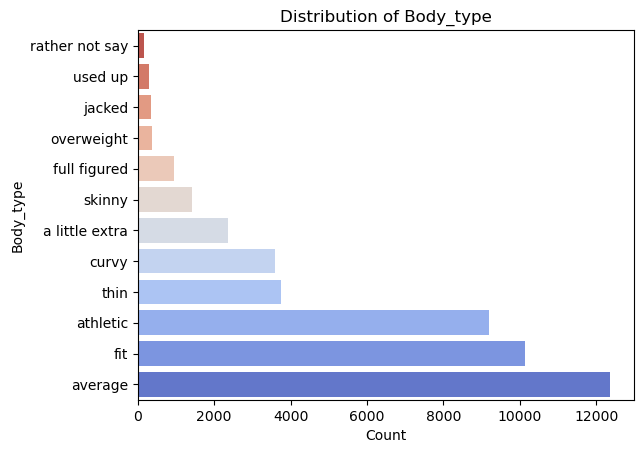

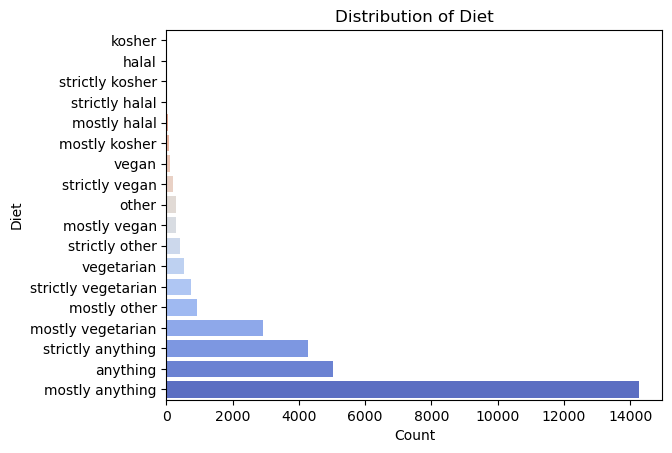

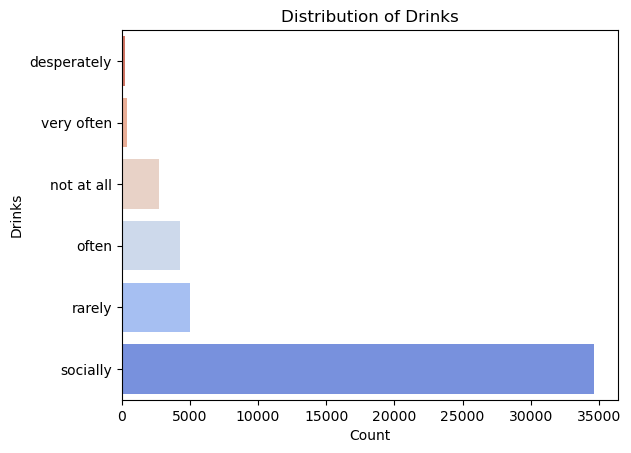

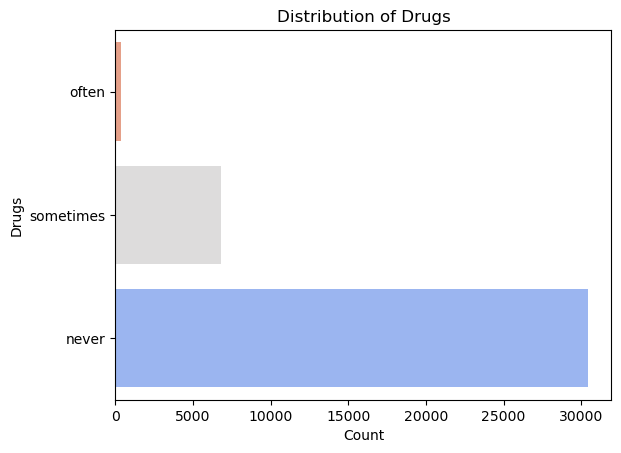

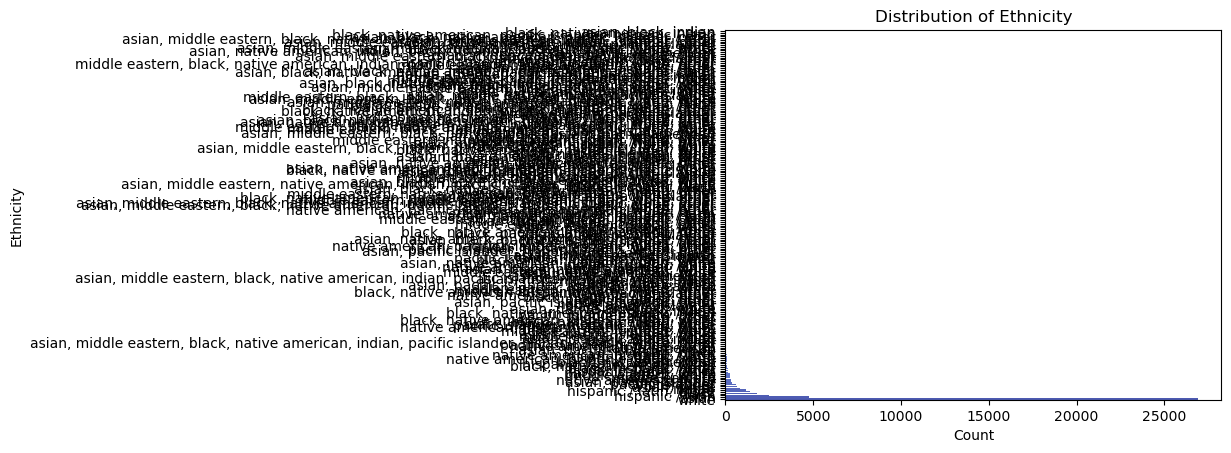

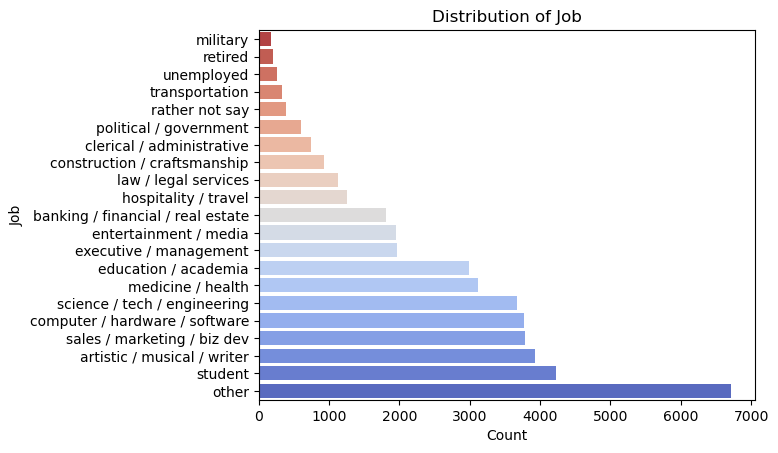

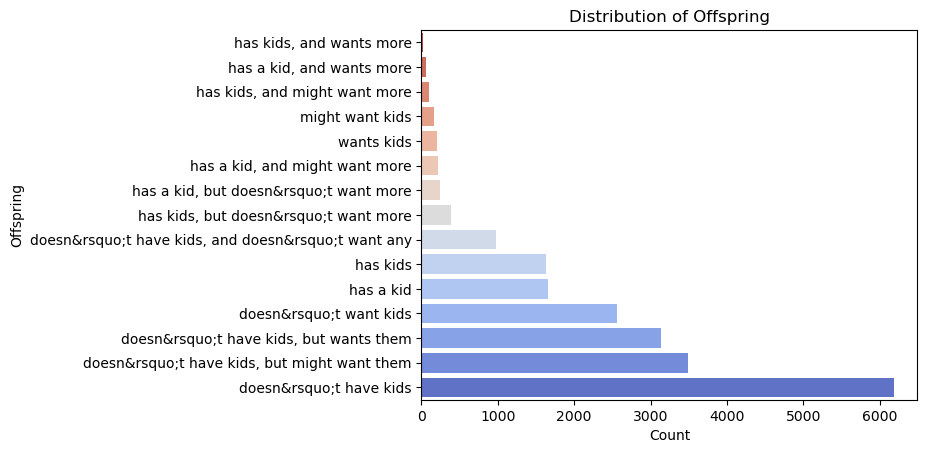

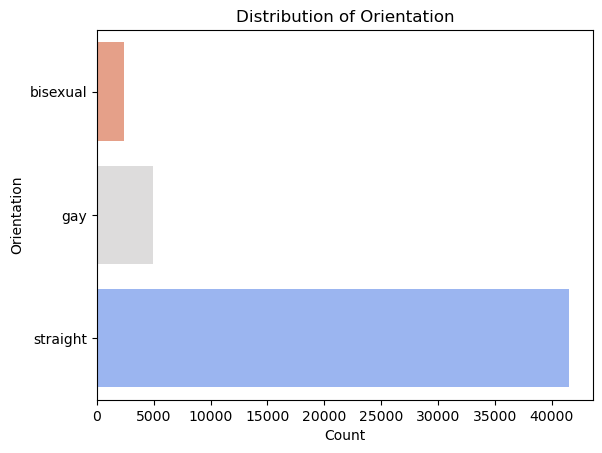

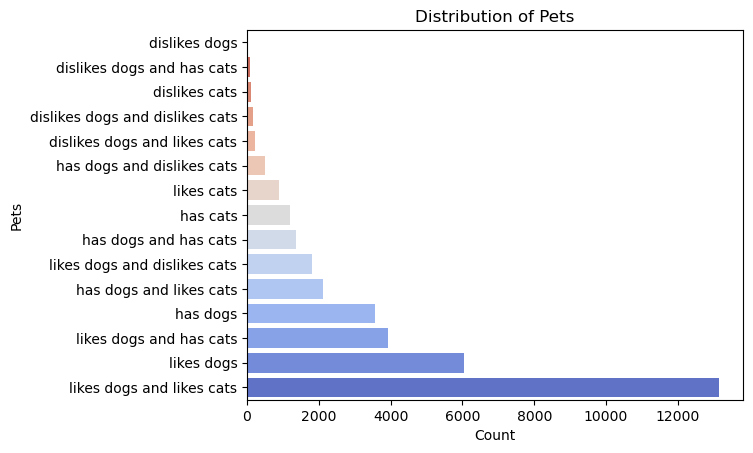

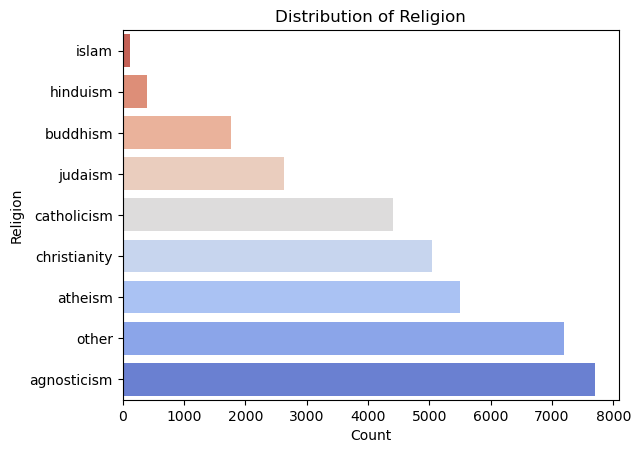

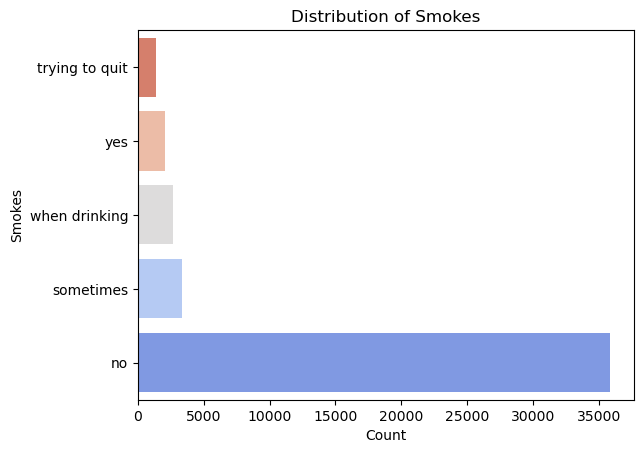

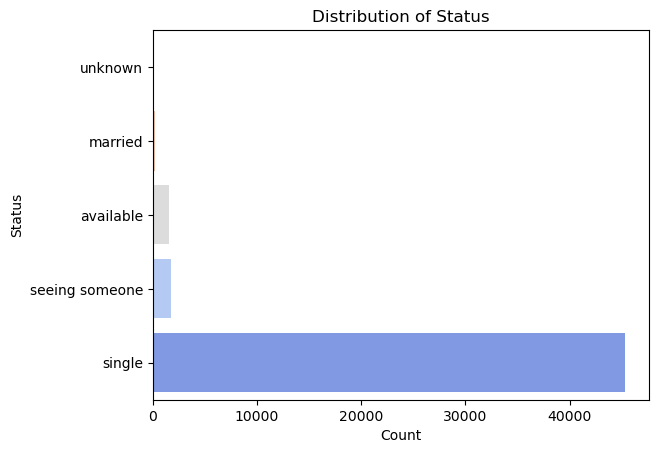

In [102]:

sign_df['religion'] = sign_df['religion'].str.split().str[0]
categorical_features = [
    'body_type', 'diet', 'drinks', 'drugs', 'ethnicity', 'job',
    'offspring', 'orientation', 'pets', 'religion','smokes','status'
]

for feature in categorical_features:
    plot_categorical_distribution(feature, sign_df)


Now, let´s see a correlation matrix between all these features and the sign features

In [103]:
sign_df = sign_df[categorical_features]
print(sign_df.head())

        body_type               diet    drinks      drugs  \
0  a little extra  strictly anything  socially      never   
1         average       mostly other     often  sometimes   
2            thin           anything  socially        NaN   
3            thin         vegetarian  socially        NaN   
4        athletic                NaN  socially      never   

             ethnicity                          job  \
0         asian, white               transportation   
1                white         hospitality / travel   
2                  NaN                          NaN   
3                white                      student   
4  asian, black, other  artistic / musical / writer   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids   

In [107]:
# One-hot encode categorical features
sign_df_encoded = pd.get_dummies(sign_df, drop_first=True)  # drop_first avoids collinearity
print(sign_df_encoded.columns)

Index(['body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_full figured', 'body_type_jacked',
       'body_type_overweight', 'body_type_rather not say', 'body_type_skinny',
       'body_type_thin',
       ...
       'religion_judaism', 'religion_other', 'smokes_sometimes',
       'smokes_trying to quit', 'smokes_when drinking', 'smokes_yes',
       'status_married', 'status_seeing someone', 'status_single',
       'status_unknown'],
      dtype='object', length=309)
